<a href="https://colab.research.google.com/github/anabarrerar/AnaBarrera_Portfolio/blob/main/EmployeeAttrition/EmployeeAttrition%26Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

# Instalar dependencias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocess

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, PowerTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Modeling
from sklearn.model_selection import train_test_split
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#import lightgbm as lgb

#Metric
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score,roc_auc_score, accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

# Case Study


Objective: Predict whether an employee will leave the company.


## **Employee Performance and Attrition**

* **EmployeeNumber** - Unique identifier of the employee
* **Attrition** -  Did the employee leave?
* **Age**
* **BusinessTravel**
* **DailyRate** - Unknown
* **Department** - Employee's department
* **DistanceFromHome** - Distance from home to work (km)
* **Education** - Education level. 1-Below College, 2-College, 3-Bachelor's, 4-Master's, 5-Doctor
* **EducationField** - Field of education
* **EnvironmentSatisfaction** - NEnvironmental satisfaction level. 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Unknown
* **JobInvolvement** - Job involvement level. 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel**- Job level (1 to 5)
* **JobRole**
* **JobSatisfaction** - Job satisfaction level. 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus**
* **MonthlyIncome**
* **MonthlyRate** - Unknown
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Is the employee over 18 years old?
* **OverTime** - Is the employee working overtime?
* **PercentSalaryHike** - - Percentage salary increase last year
* **PerformanceRating** - Performance rating level. 1-Low, 2-Medium, 3-High, 4-Outstanding
* **RelationshipSatisfaction** - Relationship satisfaction level. 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard work hours
* **StockOptionLevel** - Stock option level
* **TotalWorkingYears** - Total years of working
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - Work-life balance. 1-Bad, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at the company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

In [ ]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
print('Dataset dimensions:',data.shape)
data.head()

Dataset dimensions: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
print(data.duplicated().sum().any()) #Checking duplicates
print(data.isnull().sum().any())  #Checking missing values

False
False


In [ ]:
# Checking unique values in each column
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

* **EmployeeNumber** is a unique identifier for each employee, we can remove this variable as it will not add any information to the model.
* **EmployeeCount,Over18,StandardHours** have only a single value, these columns also do not add any kind of information so they can be eliminated.

On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

In [ ]:
data=data.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'],axis=1)

In [ ]:
num_cols=['DailyRate','Age','DistanceFromHome','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears',
          'YearsAtCompany','NumCompaniesWorked','HourlyRate',
          'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TrainingTimesLastYear']

# categorical columns
cat_cols= ['Attrition','OverTime','BusinessTravel', 'Department','Education', 'EducationField','JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance',
           'StockOptionLevel','Gender', 'PerformanceRating', 'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus','RelationshipSatisfaction']

# Exploratory Data Analysis

## Numerical features

In [ ]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.00,40.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0


* The age range within the company is from 18 to 60 years, with an average of 37 years.
* At least 50% of the employees live within a distance of 7 km, with some living up to 29 km away.
* The average income is 6500 USD. There is a significant salary difference between the third quartile of incomes (8400 USD) and the maximum values of up to 20000 USD, indicating that the highest-earning employees have a disproportionate income compared to the rest of the employees.
* The average salary hike is around 15%. At least 50% of the employees had a salary increase of 14% or less.
Employees have been associated with the company for an average of 7 years.
On average, the number of years since an employee had a promotion is 2 years.


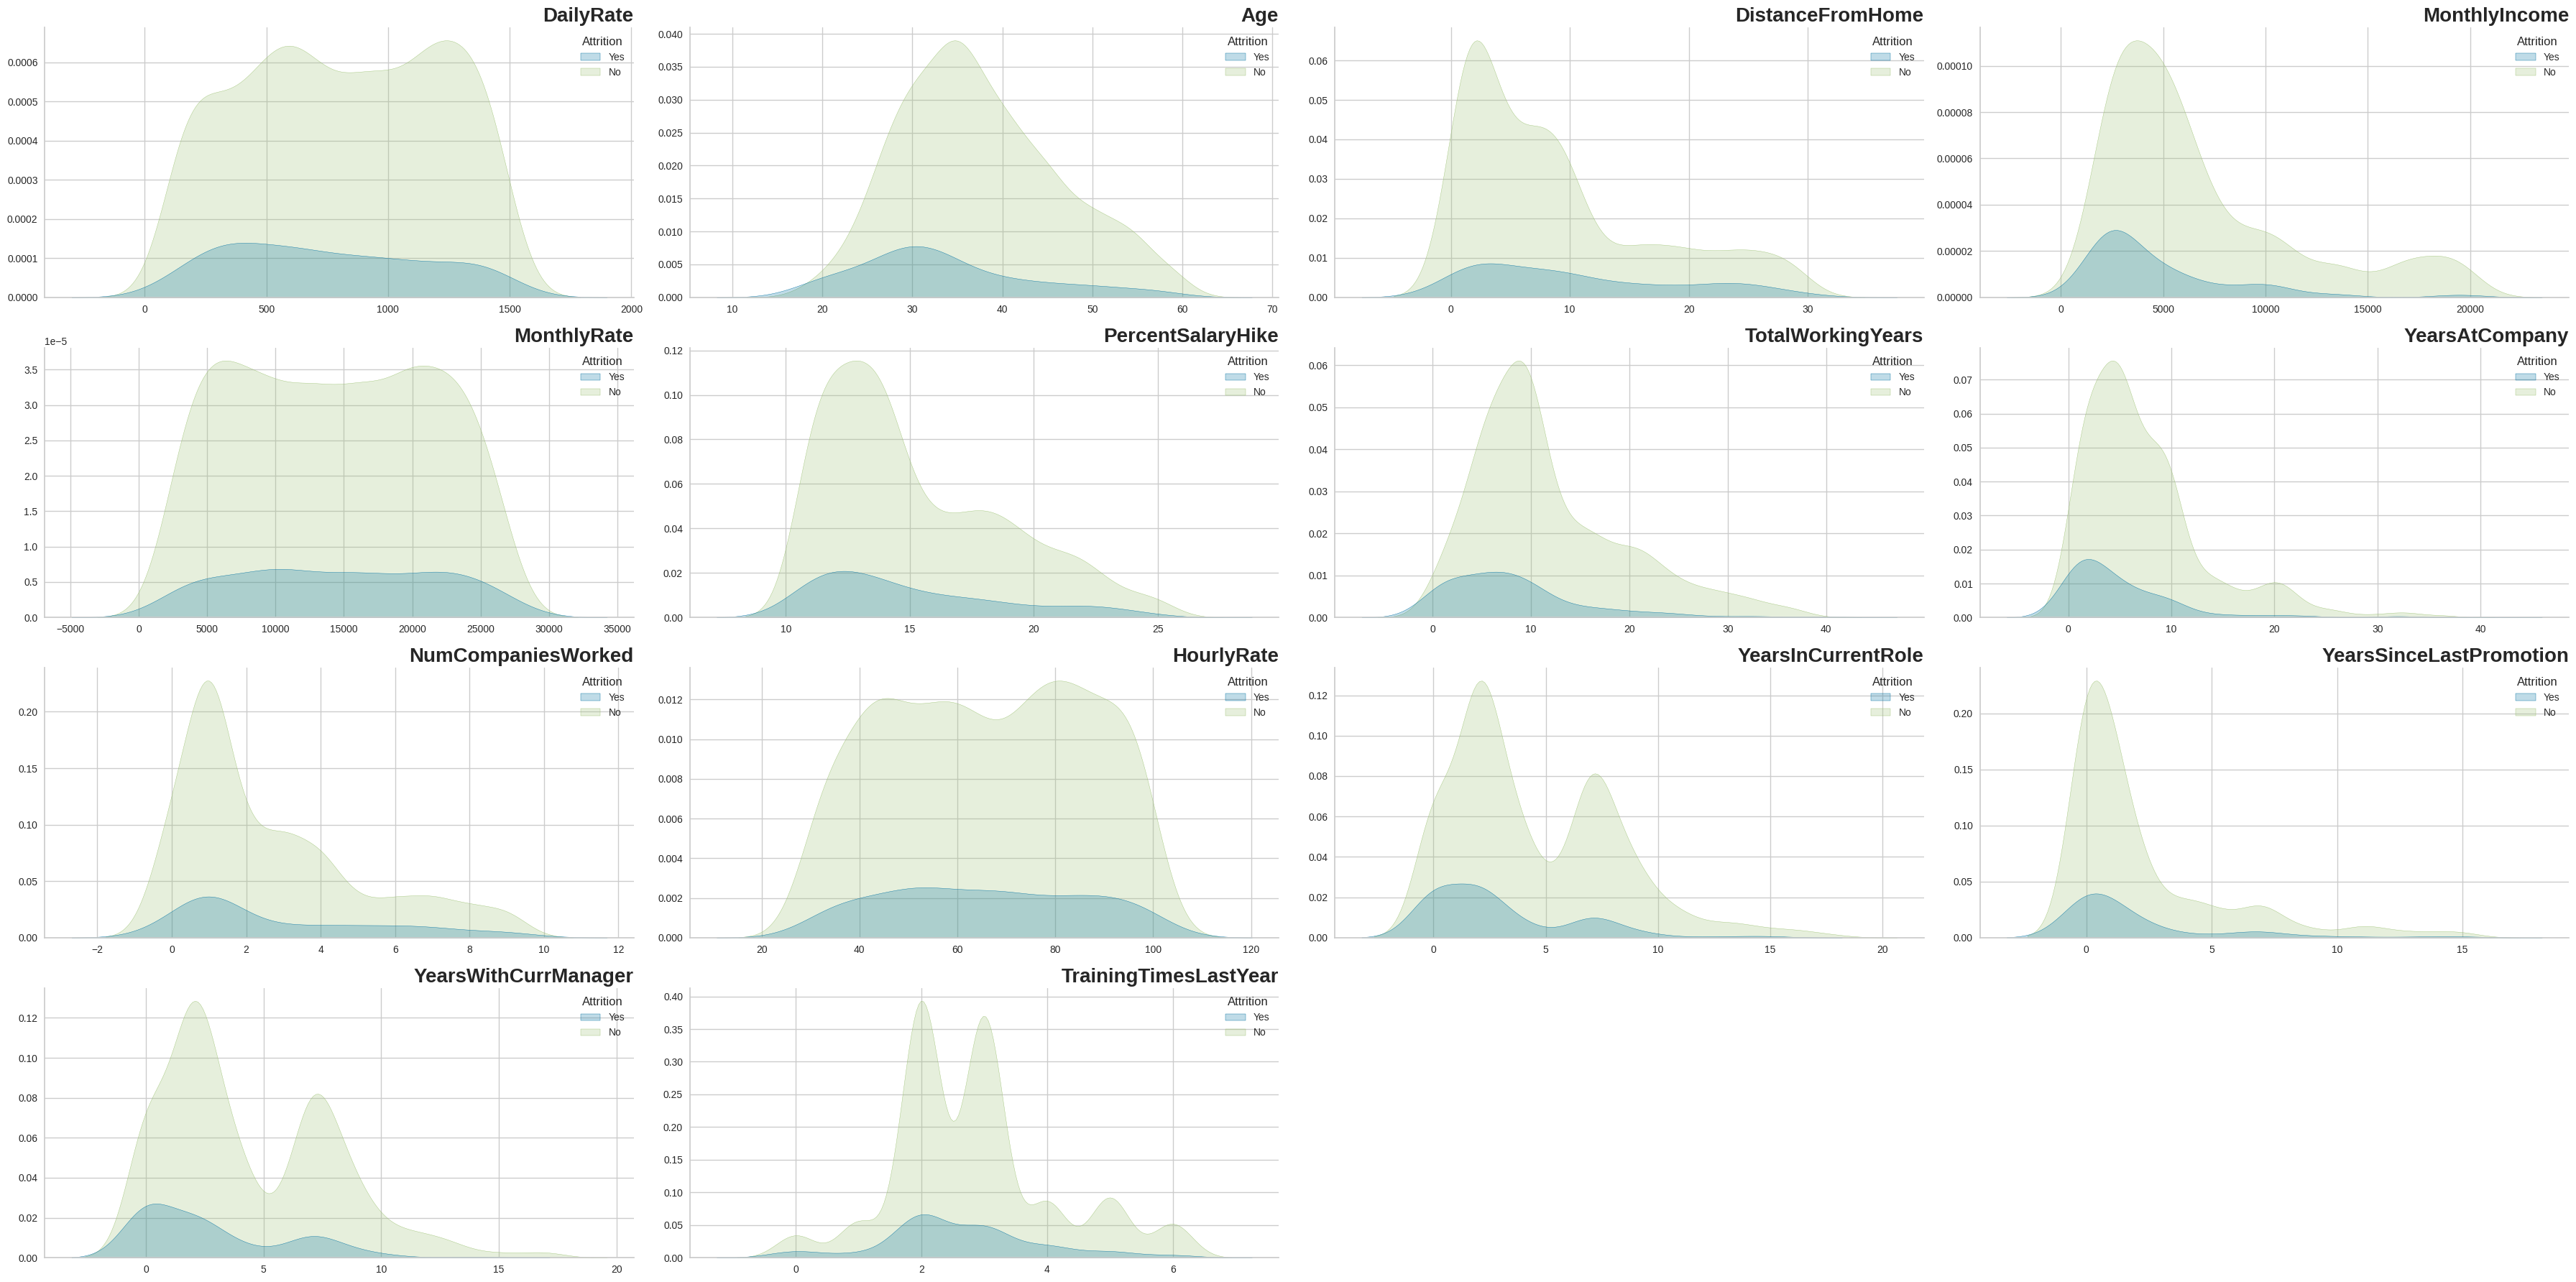

In [ ]:
#Distributions of numerical data
figsize = (6 * 6, 18)
fig = plt.figure(figsize=figsize)

for idx, col in enumerate(num_cols):
    ax = plt.subplot(4, 4, idx + 1)
    sns.kdeplot(data=data, hue='Attrition', fill=True, x=col, legend=True)

    ax.set_ylabel('')
    ax.spines['top'].set_visible(False)
    ax.set_xlabel('')
    ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='right', weight='bold', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
data.groupby(['Attrition'])[num_cols].mean() #Mean of the numerical variables grouped by 'attrition'

,DailyRate,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,NumCompaniesWorked,HourlyRate,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear
Attrition,,,,,,,,,,,,,,
No,812.504461,37.561233,8.915653,6832.739659,14265.779400,15.231144,11.862936,7.369019,2.645580,65.952149,4.484185,2.234388,4.367397,2.832928
Yes,750.362869,33.607595,10.632911,4787.092827,14559.308017,15.097046,8.244726,5.130802,2.940928,65.573840,2.902954,1.945148,2.852321,2.624473


In these graphs we can see the distribution of the numerical variables and their relationship with the employees who have and have not deserted the company. Main observations:

* The age of most of the employees who have left the company is in the range of 25 to 35 years.

* `MonthlyIncome` and `TotalWorkingYears` are skewed to the right, indicating that most workers are in entry-mid level positions in the organization.

* **Most of the employees who have left the company had a salary of less than 5000 USD and less than 10 years of work**

* **Most of the employees who have deserted had less than 5 years in the company and had only worked in that company** (Jr., mid-level). Similarly, the company shows a good proportion of employees who have been with the company for more than 10 years.

* **Most of the employees who have left the company had less than 3 years in the position.**

* The distributions of `DailyRate`, `HourlyRate` and `MonthlyRate` appear to be uniform and do not provide much information. It could be that the daily rate refers to the income earned per additional day worked, while the hourly rate could refer to the same concept that applies to the extra hours worked per day. Since these rates tend to be very similar for multiple employees in the same department, that explains the uniform distribution they show.

<Axes: >

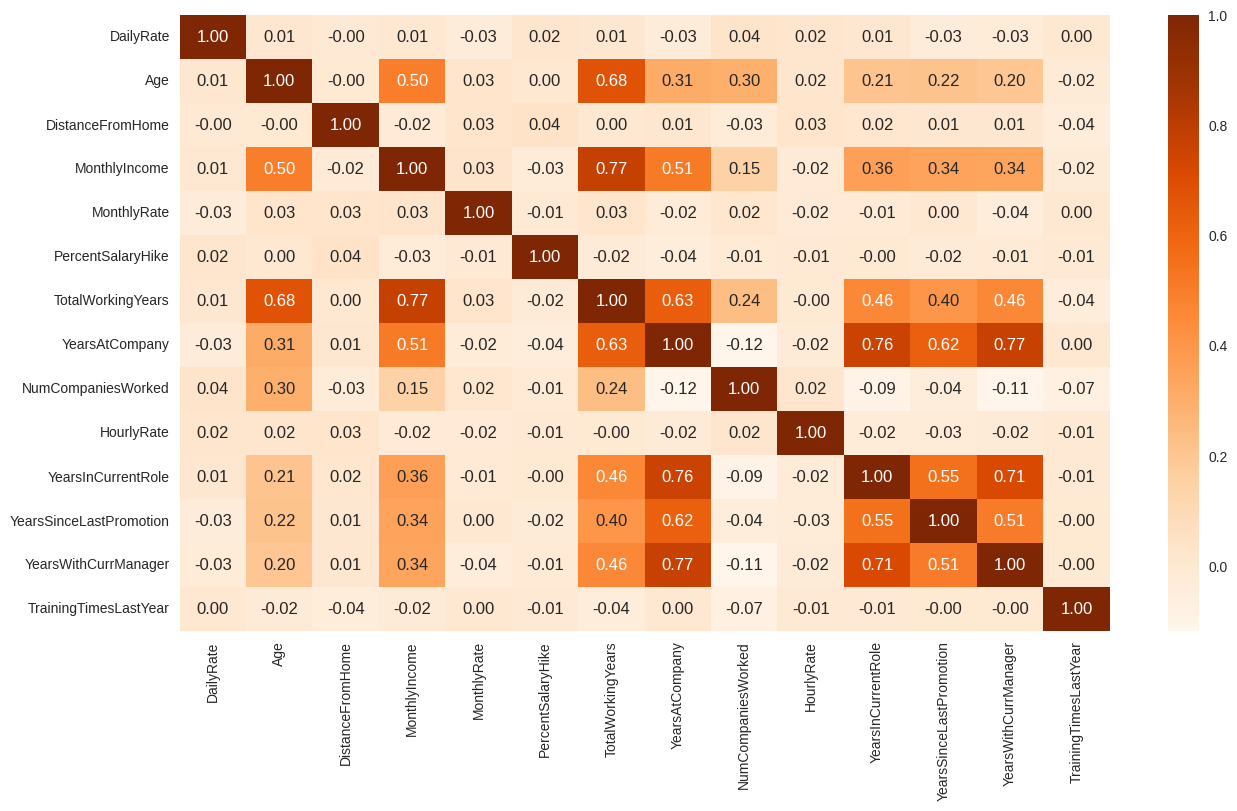

In [ ]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(data[num_cols].corr(),annot=True, fmt='0.2f', cmap='Oranges')

* **Total work experience, monthly income, years with the company and years with the current manager are highly correlated with each other and with the age of the employee**, which is easy to understand since these variables show a increase with age for most employees.

* Years with the company and years in the current position correlate to the years since the last promotion, which means that the company is not giving promotions at the right time.

## Categorical features

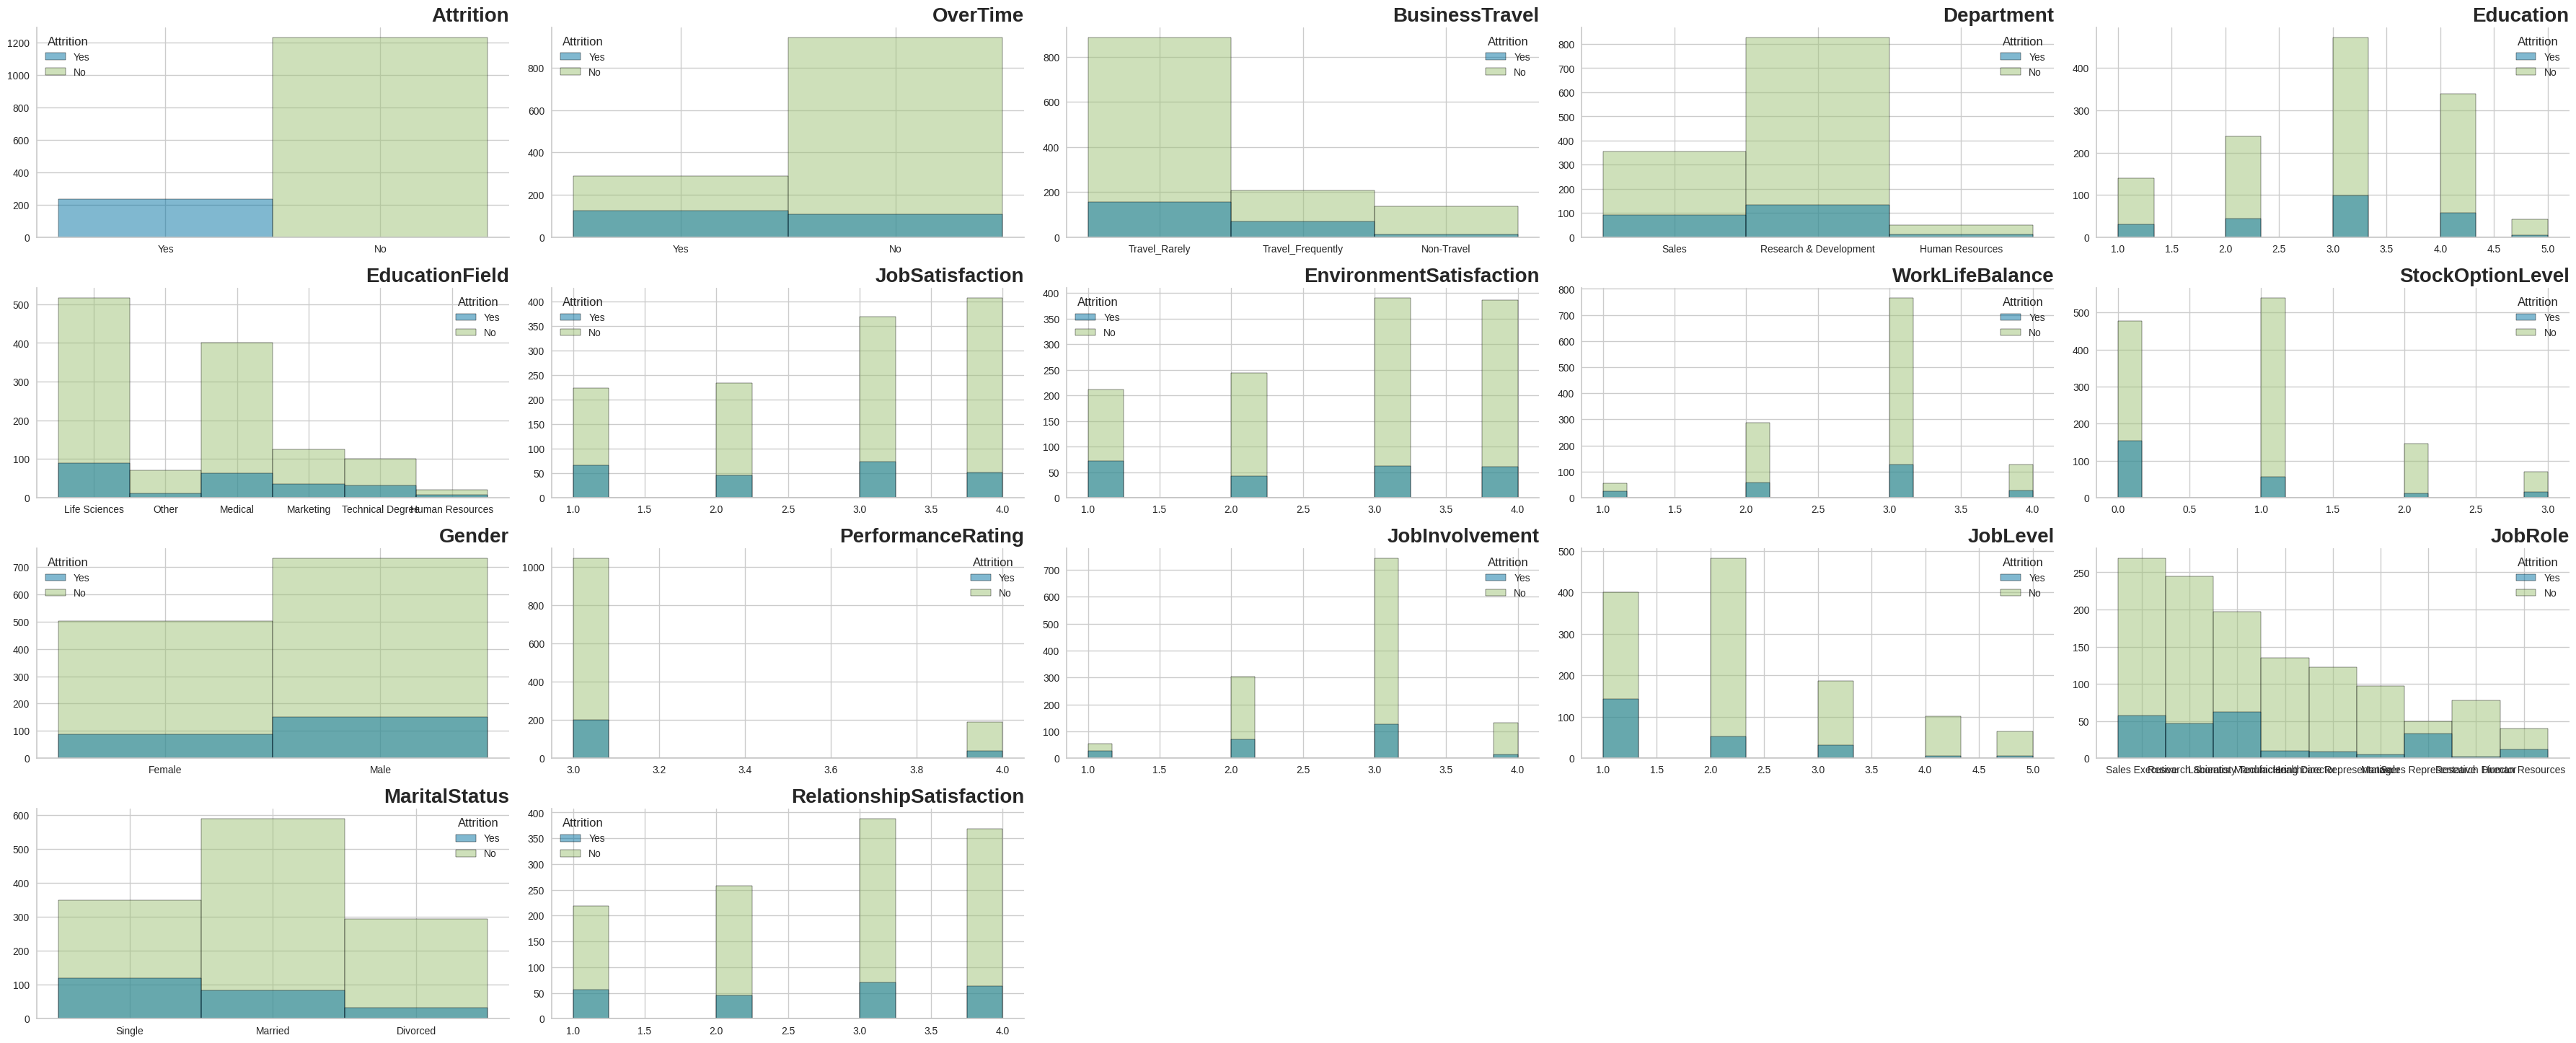

In [ ]:
#Histogram of categorical features

figsize = (6 * 6, 18)
fig = plt.figure(figsize=figsize)

for idx, col in enumerate(cat_cols):
    ax = plt.subplot(5, 5, idx + 1)
    sns.histplot(data=data, hue='Attrition', fill=True, x=col, legend=True)

    ax.set_ylabel('')
    ax.spines['top'].set_visible(False)
    ax.set_xlabel('')
    ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='right', weight='bold', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
data[data['Attrition'] == 'Yes']['JobRole'].value_counts() / data['JobRole'].value_counts() * 100

Healthcare Representative     6.870229
Human Resources              23.076923
Laboratory Technician        23.938224
Manager                       4.901961
Manufacturing Director        6.896552
Research Director             2.500000
Research Scientist           16.095890
Sales Executive              17.484663
Sales Representative         39.759036
Name: JobRole, dtype: float64

* The employee desertion rate is approximately 16%.
* **Employees who are working overtime are more likely to quit**

* Most employees come from an academic background in the fields of life sciences and medicine.
* Most of the employees are married, and **those who have defected the most are single**.

* There are no employees who have a low or average job performance rating.

* Work trips, department, level of education, field of education, gender, performance do not seem to be so related to desertion.

* **Satisfaction with employment and work environment, work-life balance, level of job participation, and level of purchasing options do appear to be related to dropout.**

* **Sales representatives, laboratory technicians and human resources are the positions with the highest dropout rate**, with 39.75%, 23.93% and 23.07% respectively.

# Data preprocessing

In [ ]:
data2 = data.copy()
y = data2['Attrition'].replace(['Yes','No'],[1,0]) #coded target
data2 = data2.drop('Attrition',axis=1)
cat_cols.remove('Attrition')

## **Numeric variables**

* **PowerTransformer:** We fit the distribution of the data to make it closer to a normal distribution and in turn mitigate the impact of extreme values ​​or biases in the data. By fitting the distribution, the transformation can make extreme values ​​less influential and improve the robustness of the model.

* **StandarScaler:** We scale the data to match the relative importance of the features.

## **Categorical variables**

**One Hot Encoding**

To avoid implicit ordering that can occur when assigning integers to categories. We will encode the variables in independent binary columns, this way independence is preserved and no unwanted ordering is introduced into the data.

* **Nominal categorical variables:** `'BusinessTravel', 'Department','Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus' `


**Ordinal Encoding**
These variables are already represented by numbers, however we will apply OrdinalEncoder() to assign a unique integer to each variable *based on their order of appearance*, thus ensuring that the inherent order of the categories is reflected in the variables. assigned numeric values, which is important in ordinal variables.

* **Ordinal categorical variables**:`'Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction','PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel','WorkLifeBalance'`.

In [ ]:
print(num_cols)

['DailyRate', 'Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'NumCompaniesWorked', 'HourlyRate', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TrainingTimesLastYear']


In [ ]:
ordinal = ['Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction','PerformanceRating',
             'RelationshipSatisfaction', 'StockOptionLevel','WorkLifeBalance']

In [ ]:
nominal= ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus' ,'OverTime']

In [ ]:
# OneHotEncoder to nominal features
nom_encoder = OneHotEncoder()
cat_encoded = nom_encoder.fit_transform(data2[nominal])
nom_cols = nom_encoder.get_feature_names_out(nominal) # getting the new names of coded nominal features

# OrdinalEncoder to ordinal features
ord_encoder = OrdinalEncoder()
ord_encoded = ord_encoder.fit_transform(data2[ordinal])

# PowerTransformer & StandardScaler to numeric features
num_transformer = PowerTransformer(method='yeo-johnson')
num_transformed = num_transformer.fit_transform(data2[num_cols])
scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_transformed)

# New df with processed data
data_processed = pd.DataFrame(data=num_scaled, columns=num_cols)
data_processed[ordinal] = ord_encoded
data_processed[nom_cols] = cat_encoded.toarray()

numeric_cols = num_cols
categoric_cols=nom_cols.tolist()+ordinal #categorical features

In [ ]:
print(data_processed.shape)
#data_processed.head(5)

(1470, 51)


## Feature Selection

In [ ]:
print('Numerical features:', len(numeric_cols))
print('Categorical features:', len(categoric_cols))

Numerical features: 14
Categorical features: 37


**Selection of univariate features**

This method involves evaluating the relationship between each variable and the target variable independently. Statistical tests can be used to select features with the strongest relationships. Since the target variable is categorical, we will apply:

* **chi-square** for categorical variables, f_classif
ANOVA F-value between label/feature for classification tasks.
* **ANOVA F test** for numerical variables

In [ ]:
#  chi^2 to categorical
chi2_selector = SelectKBest(score_func=chi2, k='all') #Select variables according to the highest k values
chi2_features = chi2_selector.fit_transform(data_processed[categoric_cols], y)
chi2_scores = chi2_selector.scores_

# ANOVA F test to numeric
f_selector = SelectKBest(score_func=f_classif, k='all')
f_features = f_selector.fit_transform(data_processed[numeric_cols], y)
f_scores = f_selector.scores_

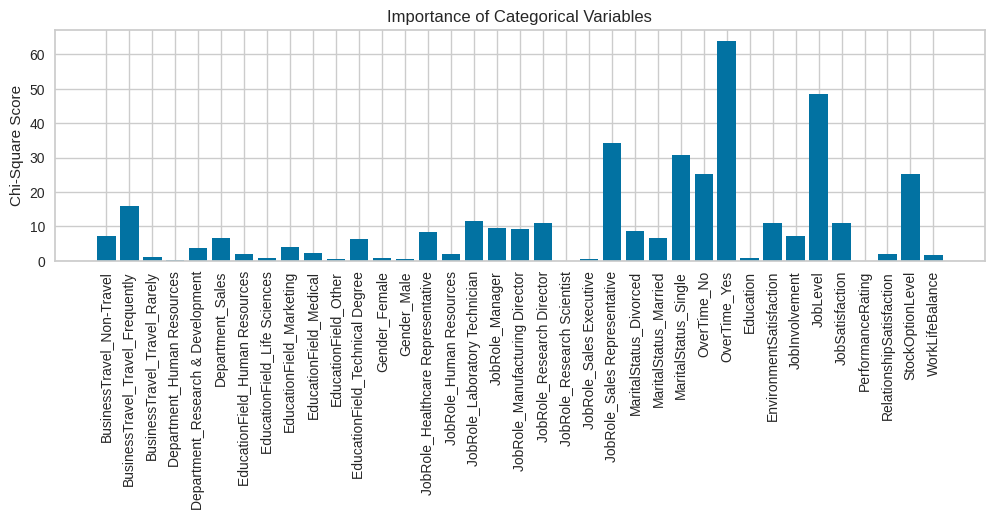

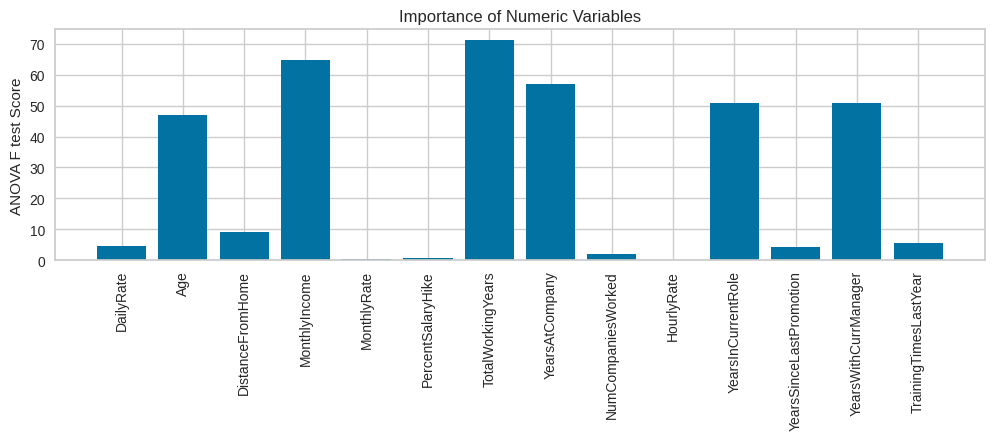

In [ ]:
# Categoric features
plt.figure(figsize=(12, 3))
plt.bar(categoric_cols, chi2_scores)
plt.ylabel('Chi-Square Score')
plt.title('Importance of Categorical Variables')
plt.xticks(rotation=90)
plt.show()

# Numeric features
plt.figure(figsize=(12, 3))
plt.bar(numeric_cols, f_scores)
plt.ylabel('ANOVA F test Score')
plt.title('Importance of Numeric Variables')
plt.xticks(rotation=90)
plt.show()

Define from which variables to make the cut:

* Categorical Cut: variables with less importance than "MaritalStatus_Married"
* Numeric Cut: variables with less importance than "DistanceFromHome"

In [ ]:
cat_cut = categoric_cols.index("MaritalStatus_Married") #índice correspondiente a la variable "MaritalStatus_Married"
cat_cut_chi2_score = chi2_scores[cat_cut] #chi2 _scorede "MaritalStatus_Married"

num_cut = numeric_cols.index("DistanceFromHome") #índice correspondiente a la variable "DistanceFromHome"
num_cut_f_score = f_scores[num_cut] # f_score de "DistanceFromHome"

print('Cut values: \n chi2_score:',cat_cut_chi2_score,'\n f_score:',num_cut_f_score)

Cut values: 
 chi2_score: 6.597585755245705 
 f_score: 9.035417807184173


In [ ]:
filtered_categoric_cols = [col for col, score in zip(categoric_cols, chi2_scores) if score > 6.5]
filtered_numeric_cols = [col for col, score in zip(numeric_cols, f_scores) if score > 9]

data_reduced= pd.concat([data_processed[filtered_categoric_cols], data_processed[filtered_numeric_cols]], axis=1)

print('df preprocesado:',data_processed.shape)
print('df reducido:',data_reduced.shape)

df preprocesado: (1470, 51)
df reducido: (1470, 26)


## Oversampling

SMOT : Synthetic Minority Oversampling Technique

In order to address the issue of imbalance we will perform oversampling. Oversampling aims to mitigate this imbalance by artificially increasing the number of instances in the minority class (Attrition class 1). This helps to provide the model with more examples to learn from, reducing the bias towards the majority class and improving its ability to predict the minority class accurately.



In [ ]:
oversample = SMOTE()
df_oversampled, y_oversampled = oversample.fit_resample(data_reduced, y)

print('df size with oversampling:',df_oversampled.shape)
print('\nTarget class count:\n')
print(pd.Series(y_oversampled).value_counts())

df size with oversampling: (2466, 26)

Target class count:

1    1233
0    1233
Name: Attrition, dtype: int64


# Modeling

At this point we have two data sets on which we can model:

**1)** Original processed data

**2)** Oversampled processed original data

To study the general performance of the three models, we will use the **Pycaret library.**

PyCaret is an open source Python library that makes the workflow of machine learning tasks quick and easy. It provides a simple and consistent interface for performing common machine learning tasks such as model selection, cross-validation, hyperparameter optimization, and model performance evaluation.

**Asessment:**

* **1)** Original data: Because the original data is unbalanced, the accuracy metric is not convenient, so working with Recall, we'll assume that the company is more interested in correctly predicting whether an employee will leave work.


In this case, the higher the recall, the greater the chances of minimizing false negatives. Therefore, the focus should be on increasing Withdrawal, or in other words, identifying very well the true positives (i.e. Class 1), so that the company can provide incentives to control the attrition rate, especially for the best performers. This would help optimize the overall cost of the project to retain the best talent.

`Higher Recall: Naive Bayes`

* **2)** Oversampled data:
For this data, we want the higher possible values of Accuracy.

`Higher Accuracy: Extra Trees Classifier`

**Validation:**

In PyCaret, the process of evaluating and validating machine learning models is typically performed using cross-validation. Cross-validation is a resampling technique that allows you to assess the performance of a model on unseen data by splitting the available data into multiple subsets, training the model on a subset, and evaluating it on the remaining subset.

In [ ]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    auc = roc_auc_score(actual, predicted)
    print("AUC:", auc)

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(5,3))
    #plt.title(name)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
data_reduced['Attrition'] = y

df_oversampled['Attrition'] = y_oversampled

In [ ]:
#Data reduced
train_data, test_data = train_test_split(data_reduced,test_size=0.3, random_state=123)
clf = setup(data=train_data, test_data=test_data ,target='Attrition',session_id=42, preprocess=False)

,Description,Value
0,Session id,42
1,Target,Attrition
2,Target type,Binary
3,Original data shape,"(1470, 27)"
4,Transformed data shape,"(1470, 27)"
5,Transformed train set shape,"(1029, 27)"
6,Transformed test set shape,"(441, 27)"
7,Numeric features,26


In [ ]:
best_model = clf.compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6492,0.7572,0.7556,0.3138,0.4395,0.2540,0.2991,0.1300
dt,Decision Tree Classifier,0.7833,0.6301,0.3944,0.3873,0.3874,0.2570,0.2587,0.2340
lda,Linear Discriminant Analysis,0.8562,0.7985,0.3611,0.6843,0.4652,0.3918,0.4223,0.2230
xgboost,Extreme Gradient Boosting,0.8436,0.8040,0.3556,0.6095,0.4397,0.3566,0.3789,0.1350
ada,Ada Boost Classifier,0.8484,0.7795,0.3444,0.6215,0.4386,0.3604,0.3832,0.2000
lr,Logistic Regression,0.8572,0.8024,0.3278,0.7098,0.4433,0.3742,0.4134,0.1430
svm,SVM - Linear Kernel,0.8212,0.0000,0.3167,0.5335,0.3561,0.2689,0.2970,0.3170
qda,Quadratic Discriminant Analysis,0.6614,0.5233,0.3111,0.1419,0.1751,0.0462,0.0445,0.1270
gbc,Gradient Boosting Classifier,0.8397,0.7846,0.2944,0.6328,0.3881,0.3098,0.3470,0.2170
lightgbm,Light Gradient Boosting Machine,0.8397,0.7939,0.2833,0.5984,0.3740,0.2979,0.3290,0.2390


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
y_pred=predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7302,0.8227,0.8070,0.2987,0.4360,0.3049,0.3700


              precision    recall  f1-score   support

           0       0.96      0.72      0.82       384
           1       0.30      0.81      0.44        57

    accuracy                           0.73       441
   macro avg       0.63      0.76      0.63       441
weighted avg       0.88      0.73      0.77       441

AUC: 0.7628837719298245


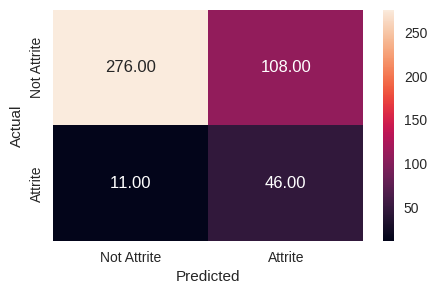

In [ ]:
metrics_score(test_data['Attrition'], y_pred['prediction_label'])

**Oversampled data**

In [ ]:
#Data Oversampling
train_data_over, test_data_over = train_test_split(df_oversampled,test_size=0.3, random_state=123)
clf_over = setup(data=train_data_over,test_data=test_data_over, target='Attrition',session_id=42,preprocess=False)

,Description,Value
0,Session id,42
1,Target,Attrition
2,Target type,Binary
3,Original data shape,"(2466, 27)"
4,Transformed data shape,"(2466, 27)"
5,Transformed train set shape,"(1726, 27)"
6,Transformed test set shape,"(740, 27)"
7,Numeric features,26


In [ ]:
best_model_over = clf_over.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9421,0.9840,0.9429,0.9388,0.9405,0.8841,0.8846,0.7730
rf,Random Forest Classifier,0.9224,0.9742,0.9036,0.9350,0.9186,0.8445,0.8456,0.6100
xgboost,Extreme Gradient Boosting,0.9189,0.9701,0.9012,0.9304,0.9153,0.8375,0.8384,0.6030
lightgbm,Light Gradient Boosting Machine,0.9183,0.9723,0.8881,0.9410,0.9136,0.8363,0.8378,0.4210
gbc,Gradient Boosting Classifier,0.9125,0.9650,0.8857,0.9313,0.9077,0.8247,0.8259,0.6760
ada,Ada Boost Classifier,0.8916,0.9521,0.8905,0.8885,0.8891,0.7832,0.7838,0.5640
dt,Decision Tree Classifier,0.8598,0.8599,0.8619,0.8522,0.8567,0.7195,0.7201,0.1970
knn,K Neighbors Classifier,0.8337,0.9385,0.9583,0.7625,0.8490,0.6695,0.6919,0.1140
lr,Logistic Regression,0.7793,0.8529,0.7714,0.7761,0.7727,0.5582,0.5596,0.1390
lda,Linear Discriminant Analysis,0.7787,0.8520,0.7786,0.7715,0.7740,0.5572,0.5588,0.1130


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
y_pred_over = predict_model(best_model_over)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9405,0.9819,0.9415,0.9463,0.9439,0.8807,0.8807


              precision    recall  f1-score   support

           0       0.93      0.94      0.94       347
           1       0.95      0.94      0.94       393

    accuracy                           0.94       740
   macro avg       0.94      0.94      0.94       740
weighted avg       0.94      0.94      0.94       740

AUC: 0.9404785474917688


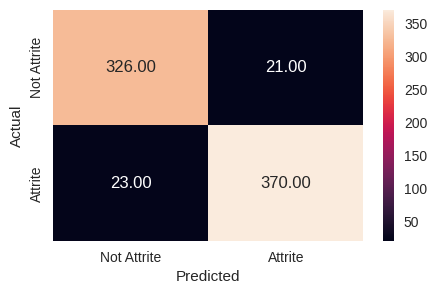

In [ ]:
metrics_score(test_data_over['Attrition'], y_pred_over['prediction_label'])

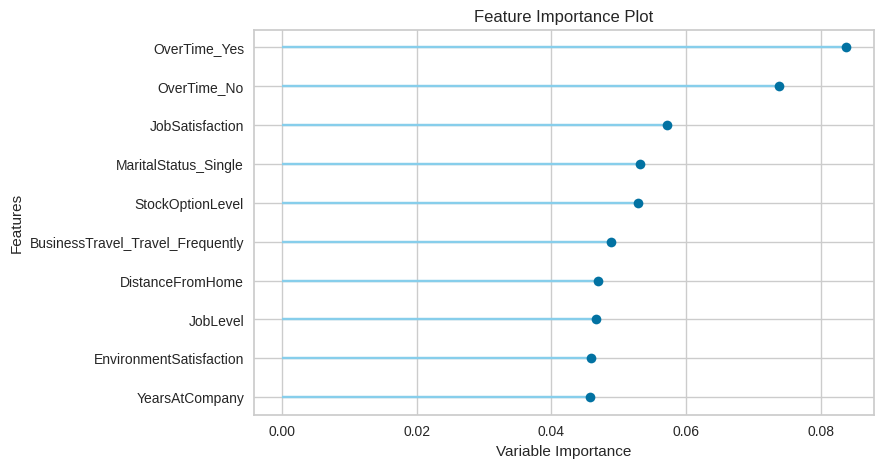

In [ ]:
# plot feature importance
plot_model(best_model_over, plot = 'feature')

# Conclusions

This project aimed to find a model that can help companies determine the factors influencing an employee's decision to leave. By identifying these factors, companies can focus on improving them to retain talented employees.

* Using the original processed data, we achieved a Recall value of up to 0.81 in class 1 (employees who leave), correctly predicting 46 out of 57 cases.

* By employing oversampling techniques, we developed a robust model with an accuracy of 0.94. This model allowed us to understand the important features that contribute to employees leaving. The key features identified were "Overtime," "Job Satisfaction," "Marital Status," and "Stock Options Level."

In conclusion, these models will be valuable for the human resources department in developing talent retention strategies. Implementing these strategies will help minimize costs associated with high turnover rates within the company.